# Flume testing

Flume test will confirm debris rack angling for the final design.

### Overall Hypothesis
Including a horizontal angle to the debris rack, increases the maximum vertical angle allowed for debris to pass.

### Method
1. Confirm the angle calculations using a known debris piece.
2. Test the angle of the debris rack with and without the horizontal angle for each angle.



In [8]:
# 1
from mech_module import *

debris_diameter = 0.003 # in m - diameter of debris
debris_rho = 600 # in kg/m^3
depth = 0.08 # in m

# record data
bf = 7*4/80
flat_angles1 = [70,70,65,60,60,50,30,35] # in degrees from horizontal
flow1 = [1.2,1.2,1,1,1,1,0.5, 0.5 ] # in L/s
height1 = [0.042,0.056,0.06,0.067,0.074,0.08,0.085, 0.083] # in m (0.08m = 8cm)

bf2 = 4*1/80
flat_angles2 = [40,55,65,65,70, 75] # in degrees from horizontal
flow2 = [0.5,0.5,1,1,1.2,1.2] # in L/s
height2 = [0.072,0.066,0.055,0.052,0.042,0.042] # in m

# calculate the velocities from the flow using L/s and height in flume
velocities1 = []
for i in range(len(flow1)):
    velocities1.append(flow1[i]/(height1[i]*depth*1000))

velocities2 = []
for i in range(len(flow2)):
    velocities2.append(flow2[i]/(height2[i]*depth*1000))

froude1 = []
for i in range(len(velocities1)):
    froude1.append(froude_number(velocities1[i], height1[i]))

froude2 = []
for i in range(len(velocities2)):
    froude2.append(froude_number(velocities2[i], height2[i]))

# calculate the expected maximum angle for each velocity
exp_angles = []
for i in np.linspace(0.1, 3.5, 20):
    exp_angles.append(-debris_angle(i, debris_diameter, debris_rho))

# print(froude_number(3.5, 1))

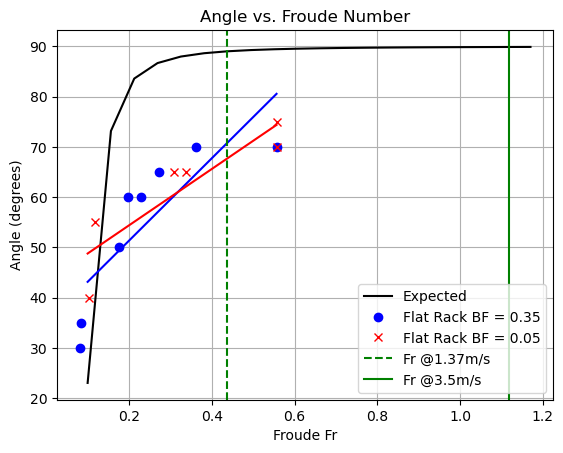

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# present data
# plot the velocity on the x-axis and the angle on the y-axis 
plt.figure()
plt.plot(np.linspace(0.1,1.17,20), exp_angles, '-', label='Expected', color='k')
plt.plot(froude1, flat_angles1, 'o', label='Flat Rack BF = %s' %bf, color='b')
plt.plot(froude2, flat_angles2, 'x', label='Flat Rack BF = %s' %bf2, color='r')
# plt.plot(froude, angled_angles, 'x', label='Angled Rack', color='r')

# draw a line of best fir for the flat rack and the angled rack
# Calculate the line of best fit for flat_angles
flat_fit1 = np.polyfit(froude1, flat_angles1, 1)
flat_fit_fn1 = np.poly1d(flat_fit1)
flat_fit2 = np.polyfit(froude2, flat_angles2, 1)
flat_fit_fn2 = np.poly1d(flat_fit2)

# # Plot the line of best fit for flat_angles
plt.plot(np.linspace(0.1, max(froude1), 20), flat_fit_fn1(np.linspace(0.1, max(froude1), 20)), '-',color='b')
plt.plot(np.linspace(0.1, max(froude2), 20), flat_fit_fn2(np.linspace(0.1, max(froude2), 20)), '-',color='r')

plt.xlabel('Froude Fr')
plt.ylabel('Angle (degrees)')
plt.title('Angle vs. Froude Number')

# plot a vertical dashed line at the average operating Froude number and the flood event Froude number
avg_froude = 0.437
flood_froude = 1.117
plt.axvline(x=avg_froude, color='g', linestyle='--', label='Fr @1.37m/s')
plt.axvline(x=flood_froude, color='g', linestyle='-', label='Fr @3.5m/s')
plt.legend()
plt.grid()
plt.show()
